In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

## importing the dataset

In [ ]:
df_train = pd.read_csv('/content/Train.csv')

In [ ]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_train.shape

(8523, 12)

## checking for null values

In [ ]:
df_train.isnull().sum()
percentage = df_train.isnull().sum() * 100 / len(df_train)
print(percentage)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


## checking for duplicate values

In [ ]:
df_train.duplicated().any()

# there are no duplicate values in our dataset

False

## handling null values

In [ ]:
## handling missing values on item weight column

# df_train['Item_Weight']

# calculating mean and median for this column
mean1 = df_train['Item_Weight'].mean()
median1 = df_train['Item_Weight'].median()
print(mean1, ", ",median1)

12.857645184135976 ,  12.6


In [ ]:
#creating new column to check if imputing missing values with mean and median changed the variance
# of the data or not

df_train['Item_Weight_mean'] = df_train['Item_Weight'].fillna(mean1)
df_train['Item_Weight_median'] = df_train['Item_Weight'].fillna(median1)
df_train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [ ]:
# checking variance
print("original column variance" , df_train['Item_Weight'].var())
print("after imputation with mean column variance" , df_train['Item_Weight_mean'].var())

print("after imputation with median column variance" , df_train['Item_Weight_median'].var())


original column variance 21.56168825983637
after imputation with mean column variance 17.860121735060453
after imputation with median column variance 17.869561454073366


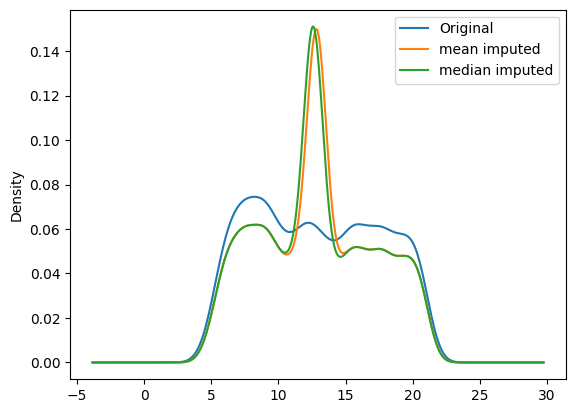

<Axes: >

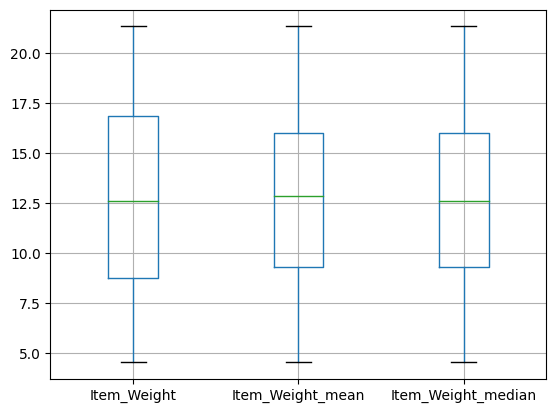

In [ ]:
# we'll plot and see if imputation has affected our data set drastically or not

df_train['Item_Weight'].plot(kind = "kde" , label="Original")
df_train['Item_Weight_mean'].plot(kind = "kde" , label="mean imputed")
df_train['Item_Weight_median'].plot(kind = "kde" , label="median imputed")

plt.legend()
plt.show()

#checking with boxplot

df_train[['Item_Weight' , 'Item_Weight_mean' , 'Item_Weight_median']].boxplot()


From the above graph we can conclude that mean and median imputation is affecting the spead of data in our data set as the density around mean/meadian is very high compared to other data points

also the boxplot is also showing us the same thing as the box is reduced in the 2nd and 3rd plot showing us the spread of data is decreased after mean/median imputation


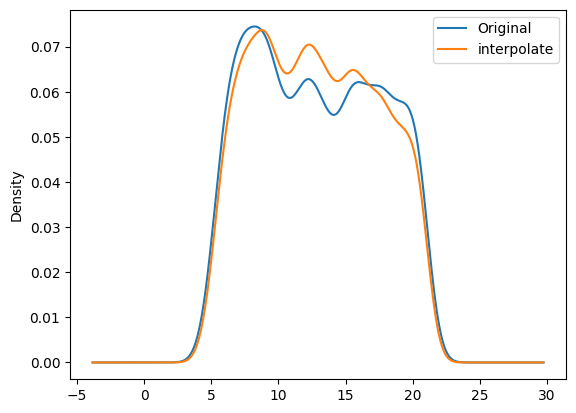

<Axes: >

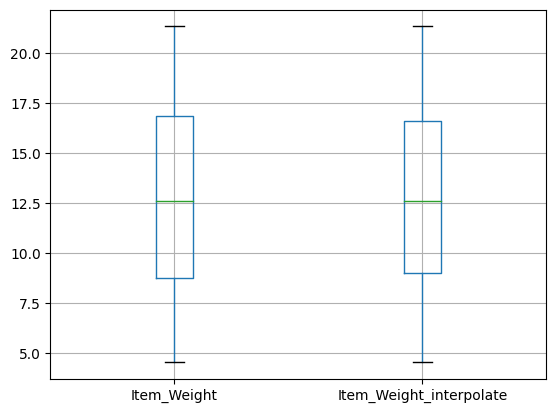

In [ ]:
#using linear interpolate method in pandas to handle missing values
df_train['Item_Weight_interpolate'] = df_train['Item_Weight'].interpolate(method='linear')

#plotting to check how to graph looks like for after interpolation vs old column
df_train['Item_Weight'].plot(kind = "kde" , label="Original")
df_train['Item_Weight_interpolate'].plot(kind = "kde" , label="interpolate")
plt.legend()
plt.show()

#boxplot
df_train[['Item_Weight' , 'Item_Weight_interpolate']].boxplot()

Since we have done inputing the item weight with an appropriate method we will now  drop the other columns that we created for experimentation

In [ ]:
df_train = df_train.drop(['Item_Weight_mean'  , 'Item_Weight_median'] , axis = 1)
df_train = df_train.drop(['Item_Weight'] , axis = 1)

In [ ]:
# validating their drop
df_train.head(1)

#checking if all missing values are hanndled in weight column
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


## Computing missing values in Outlet size

As outlet size is a catergorical column we cant use mean/median to handle it as such we'll use mode and with some strategies to handle this particular column

In [ ]:
df_train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


here we will fill the missing values in outlet size based on outlet type as the type of outlet has a impact on the size of that outlet.


In [ ]:
df_train['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


Now we are going to calculate mode of 'outlet size' column having taken into consideration the 'outlet type' column using pivot table

In [ ]:
mode_values = df_train.pivot_table(values='Outlet_Size' , columns= 'Outlet_Type' , aggfunc=(lambda x:x.mode()[0]))
print(mode_values)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


Now we will fill in the missing values based on the above values that we got using the pivot table functions for each outlet type.

In [ ]:
#handing missing values in outlet size column

missing_values = df_train['Outlet_Size'].isnull()
# print(missing_values)

df_train.loc[missing_values, 'Outlet_Size'] = df_train.loc[missing_values , 'Outlet_Type'].apply(lambda x: mode_values[x])

In [ ]:
#checking if all missing values are handled or not
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


We have now successfully taken care of all missing values in the dataset

Now we will work each columns to check and correct them, starting with the column 'Item_Fat_Content' here this column has 1 or more catergories that are getting repeated with more than one name.

In [ ]:
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


Now from the above output we can clearly see that there are only 2 type of fat content in the table which are low fat and regular fat but the column as 'LF' , 'low fat' and 'reg' which also means as low and regular fat but they have different naming as a result they are forming into another category so now we will try to merge these unwanted columns into two catergories only namely: 'LF' and 'Regular'


In [ ]:
df_train.replace({'Item_Fat_Content':{'Low Fat': 'LF' , 'low fat': 'LF' , 'reg' : 'Regular'}},inplace = True)
df_train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
Regular,3006


Here we have successfully removed the unwanted and repeated categories in the columns and have catergorized the column into 2 catergories 'LF' - low fat and 'Regular' fat.

Now we will work on the columns 'Item_visibility'

In [ ]:
df_train['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


From above we can see that the count of 0's is 526 in 'Item Visibility' which we will treat it as a null value as without any visibility the products wouldve not been sold so with the conclusion we can call this as a null value as treat it accordingly.

In [ ]:
#handling the zeros in the item_visibility column
# first we will replace the value 0 with nan

df_train['Item_Visibility_interpolate'] = df_train['Item_Visibility'].replace(0 , np.nan).interpolate(method='linear')

In [ ]:
df_train.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [ ]:
#checking if all 0's are handled or not
df_train['Item_Visibility_interpolate'].value_counts()

,count
Item_Visibility_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


Now will check the distribution of 'Item_Visibility' before and after the handling of the null value.


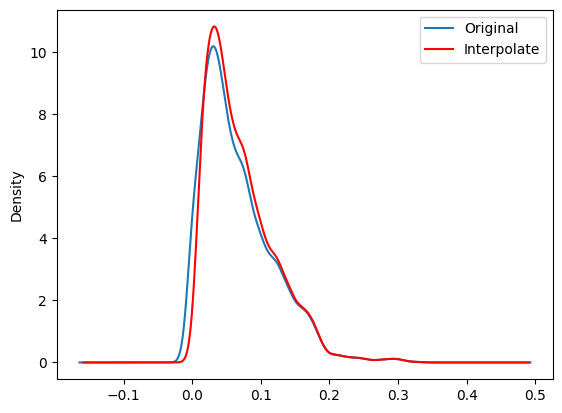

In [ ]:
df_train['Item_Visibility'].plot(kind="kde" , label="Original")
df_train['Item_Visibility_interpolate'].plot(kind="kde" , color = 'red',label="Interpolate")
plt.legend()
plt.show()

From the graph we can see that even after changing the value 0's with the help of linear interpolate we haven't drastically changed the variance in this particular column of the dataset so now we will drop the original column which has the 0's and use the new interpolated column as our new 'Item_Visibility' column.

In [ ]:
df_train = df_train.drop('Item_Visibility' , axis=1)

In [ ]:
# validating the column drop
df_train.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


The columns is successfully dropped now lets move on to the next column which is
'Item_type'


In [ ]:
df_train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In this column there is nothing to manuplate to further improve the quality of the column so we move to the next column.

In [ ]:
df_train['Item_Identifier'].value_counts().sample(5)

,count
Item_Identifier,
FDS10,4
NCA53,6
FDV21,4
FDK15,6
FDR27,7


Now in this column we can see a peculiar pattern in the identification of items in the dataset where each identifiere starts with a common code like FD, NC, DR which stands as a shortform for food, Non consumable and Drinks respectively and so we will create a new column catergorizing these values into three categories.

In [ ]:
df_train['Item_Identifier'] = df_train['Item_Identifier'].apply(lambda x: x[:2])

now with the above code we have successfully converted this into a catergorical column having three categories FD(Food), DR(Drinks), NC(Non consumables)

In [ ]:
df_train['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


Now let us move on to the next column which is 'Outlet_Establishment_Year'

In [ ]:
df_train['Outlet_Establishment_Year']

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


in this column we can see on which column a particular outlet was established so now here we will try to extract the total number of year the a particular outlet is present ie the age of a particular outlet.


In [ ]:
#importing datetime module for this task
import datetime as dt

In [ ]:
current_year = dt.datetime.today().year

In [ ]:
#calculating the time period for which each outlet has been present.
df_train['Outlet_age'] = current_year - df_train['Outlet_Establishment_Year']

Now we can drop the original column as the new age column that we have created has/can provide more information to the dataset than the column 'Outlet_Establishment_year'


In [ ]:
df_train = df_train.drop('Outlet_Establishment_Year' , axis=1)

In [ ]:
df_train.head() # checking the changes that we just made

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


Now in our dataset we have many categorical columns so we will start handling them as we cant feed categorical values to the ML model.

## Handling Categorical Values

Here we are using Ordinal encoder and not Label encoding as the sklearn documentation states that the label encoding transformer should only be on the target variable y and Not the input variable x and hence we use ordinal intead of Label encoding

Now we will import Oridnal encoder from sklearn library for our task

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#creating a copy of our data to start our encoding process
data_encoded = df_train.copy()

cat_cols = df_train.select_dtypes(include=['object']).columns

for col in cat_cols:
  oe = OrdinalEncoder()
  data_encoded[col] = oe.fit_transform(data_encoded[[col]])
  print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


Now we have successfully encoded all catergorical values using Ordinal encoding
the below code shows the same

In [ ]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


Now lets seperate independent and dependent variables

In [ ]:
X = data_encoded.drop('Item_Outlet_Sales', axis=1) # vector X stores all the independent variable
y = data_encoded['Item_Outlet_Sales'] # vector y stores our dependent variable


Now here our target variable y is a continous target variable which makes our problem a regression problem so we'll also be choosing our algorithm based this information.

## Model inmplementation


1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

rf = LinearRegression()

scores = cross_val_score(rf,X,y,cv=5,scoring='r2')

print("score = " ,scores.mean())

score =  0.501547093101739


**2**. Random Forest Regressor

In [ ]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

# importing cross validation score
from sklearn.model_selection import cross_val_score

#creating a instance of randomforest regressor
rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)

#performing cross validation
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')

#printing the average after cross validation is done
print("score = " ,scores.mean())

score =  0.555040442702387


3. XGBRFRegressor

In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators = 100 , random_state = 42)

scores = cross_val_score(xg,X,y,cv=5,scoring='r2')

print("score = " ,scores.mean())

score =  0.5951283683315813


XGBRFRegressor Feature importance

In [ ]:
xg = XGBRFRegressor(n_estimators = 100 , random_state = 42)

xg1 = xg.fit(X,y)

pd.DataFrame({
    'feature': X.columns,
    'XGBRFRegressor': xg1.feature_importances_

}).sort_values(by= 'XGBRFRegressor' , ascending = False)

,feature,XGBRFRegressor
7,Outlet_Type,0.364966
5,Outlet_Size,0.178446
10,Outlet_age,0.148148
4,Outlet_Identifier,0.136959
3,Item_MRP,0.135346
6,Outlet_Location_Type,0.028170
9,Item_Visibility_interpolate,0.002421
8,Item_Weight_interpolate,0.002282
2,Item_Type,0.001651
1,Item_Fat_Content,0.000879


Now After checking the feature importance we can try dropping the features will low impact on the model and then check the score again.

from the above table we will select the first 5 features with highest feature importance.


In [ ]:
feature = ['Item_Visibility_interpolate' , 'Outlet_Location_Type' , 'Item_Visibility_interpolate' , 'Item_Weight_interpolate' , 'Item_Type' , 'Item_Identifier' , 'Item_Fat_Content']

After dropping we will check the score again.

In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators = 100 , random_state = 42)

scores = cross_val_score(xg,X.drop(feature , axis = 1),y,cv=5,scoring='r2')

print("r2 mean value = " ,scores.mean())

r2 mean value =  0.5962374330802511


In [ ]:
final_data = X.drop(columns = ['Item_Visibility_interpolate' , 'Outlet_Location_Type' , 'Item_Visibility_interpolate' , 'Item_Weight_interpolate' , 'Item_Type' , 'Item_Identifier' , 'Item_Fat_Content'], axis =1)

In [ ]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


Best Model

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
xg_final = XGBRFRegressor()

In [ ]:
xg_final.fit(final_data , y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(final_data,y,test_size=20, random_state=42)


In [ ]:
xg_final.fit(X_train , y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
#predicting on test split
y_pred = xg_final.predict(X_test)

Checking mean Absolute error (MAE)

In [ ]:
a = mean_absolute_error(y_test, y_pred)
print("MAE = " , a)

MAE =  526.1151087023926


Plotting the predicted and the actual data

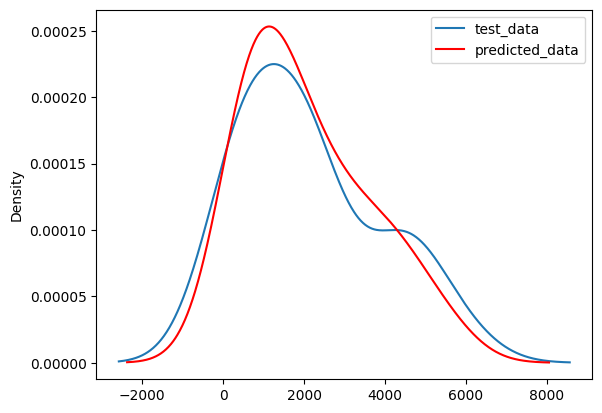

In [ ]:
y_test.plot(kind="kde" , label="test_data")
y_pred_series = pd.Series(y_pred)
y_pred_series.plot(kind="kde", color="red", label="predicted_data")
plt.legend()
plt.show()

## Prediction on a unseen Data point

In [ ]:
pred = xg_final.predict(np.array([[141.6180 , 9.0 , 1.0 , 1.0 , 24]]))[0]

In [ ]:
print(f"sales value is between {pred - 528.9367:.2f} and {pred + 528.9367:.2f}")

sales value is between 1511.04 and 2568.91
